In [362]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import re
import dateparser

In [11]:
df = pd.read_csv('labeld_apps.csv')

df.shape

(191524, 33)

In [686]:
(df['id'].value_counts() > 1).value_counts()

False    191123
True        200
Name: id, dtype: int64

In [280]:
google_play_df = df[df['store'] == 0]
app_store_df = df[df['store'] == 1]

app_store_df.rename(columns={'ios_id': 'android_id'}, inplace=True)

In [297]:
matched_app_store = pd.merge(app_store_df, google_play_df, left_on='id', right_on='ios_id', suffixes=('_app_store', '_google_play'))
matched_google_play = pd.merge(google_play_df, app_store_df, left_on='id', right_on='android_id', suffixes=('_google_play', '_app_store'))

In [281]:
google_play_df.head()

,store,id,title,author,agerating,coverimage,description,devsite,devmail,address,...,screenshots,localdescs,similarapps,os,lastseen,ratinghistogram,currentrating,currentratingcount,valid,ios_id
0,0,jp.ne.atech.android.rolling3d.yellow.free,Rolling Rolling Fallilng 3D,Atech Inc.,EveryoneLearn More,https://lh3.googleusercontent.com/0eZlyAyxhA63...,That 'Rolling Rolling Falling!’has evolved int...,http://edu.atech.jp/?utm_source=app&utm_campai...,atechandroid@gmail.com,〒105-0004 東京都港区新橋1-18-21 第一日比谷ビル5F,...,[https://lh3.googleusercontent.com/4qMgDAPdqBV...,[That 'Rolling Rolling Falling!’has evolved in...,"[mm2d3d.myanmar2d3d, com.adamdaniel.gamebooste...",2.3 and up,1.592101e+12,"[-1.0, -1.0, -1.0, -1.0, -1.0]",0.0,0.0,True,626140416
1,0,com.sbwell.mobile,Sonic Boom Wellness,SBW Mobile Dev,Everyone,https://play-lh.googleusercontent.com/LlsmSSSc...,When you dive in and play with the Sonic Boom ...,http://www.sonicboomwellness.com/,mobiledev@sbwell.com,NaN,...,[https://play-lh.googleusercontent.com/40MPyjc...,[When you dive in and play with the Sonic Boom...,"[com.roblox.client, com.netflix.mediaclient, c...",4.1 and up,1.605053e+12,"[25.0, 6.0, 8.0, 10.0, 29.0]",0.0,0.0,True,1219421380
2,0,com.afl.afl_gcfc.android,Gold Coast SUNS Official App,Telstra Digital Media,Everyone,https://play-lh.googleusercontent.com/MLHGWQmS...,"Updated for 2020, the Gold Coast SUNS Official...",http://www.goldcoastfc.com.au,info@goldcoastfc.com.au,"Level 7, 150 Lonsdale Street, Melbourne, VIC 3000",...,[https://play-lh.googleusercontent.com/ajuOZxK...,"[Updated for 2020, the Gold Coast SUNS Officia...","[com.traderumors, co.pixelbeard.theanfieldwrap...",5.0 and up,1.611879e+12,"[5.0, 5.0, 9.0, 28.0, 85.0]",0.0,0.0,True,510354084
3,0,com.ss.titanostore,Titano Store,TITANKA! Spa,Everyone,https://play-lh.googleusercontent.com/U9dI2SeR...,Titano Store App è nata per dare alcune funzio...,http://www.titano-store.com,info@titano-store.com,NaN,...,[https://play-lh.googleusercontent.com/0B8_4n3...,[Titano Store App è nata per dare alcune funzi...,"[com.suxlv2.miexpenses, ch.bkb.mobile.banking....",4.4 and up,1.611447e+12,"[14.0, 13.0, 18.0, 24.0, 115.0]",0.0,0.0,True,828256916
4,0,com.makemytripseller,MakeMyTrip Experiences - Seller,MakeMyTrip.com,Everyone,https://play-lh.googleusercontent.com/fpD5kLOE...,Note : This App is restricted to partners sell...,http://www.makemytrip.com,mobile.makemytrip@gmail.com,"MakeMyTrip DLF Building No. 5 Tower C, DLF Cyb...",...,[https://play-lh.googleusercontent.com/LL7V3mA...,[Note : This App is restricted to partners sel...,"[com.trackingtopia.skyscan, gmin.app.reservati...",4.1 and up,1.612225e+12,"[12.0, 3.0, 6.0, 5.0, 49.0]",0.0,0.0,True,1455458148


In [693]:
matched_google_play.head()

,store_google_play,id_google_play,title_google_play,author_google_play,agerating_google_play,coverimage_google_play,description_google_play,devsite_google_play,devmail_google_play,address_google_play,...,screenshots_app_store,localdescs_app_store,similarapps_app_store,os_app_store,lastseen_app_store,ratinghistogram_app_store,currentrating_app_store,currentratingcount_app_store,valid_app_store,android_id
0,0,jp.ne.atech.android.rolling3d.yellow.free,Rolling Rolling Fallilng 3D,Atech Inc.,EveryoneLearn More,https://lh3.googleusercontent.com/0eZlyAyxhA63...,That 'Rolling Rolling Falling!’has evolved int...,http://edu.atech.jp/?utm_source=app&utm_campai...,atechandroid@gmail.com,〒105-0004 東京都港区新橋1-18-21 第一日比谷ビル5F,...,[https://is2-ssl.mzstatic.com/image/thumb/Purp...,NaN,NaN,NaN,1.611447e+12,NaN,4.00000,3.0,True,jp.ne.atech.android.rolling3d.yellow.free
1,0,com.sbwell.mobile,Sonic Boom Wellness,SBW Mobile Dev,Everyone,https://play-lh.googleusercontent.com/LlsmSSSc...,When you dive in and play with the Sonic Boom ...,http://www.sonicboomwellness.com/,mobiledev@sbwell.com,NaN,...,[https://is2-ssl.mzstatic.com/image/thumb/Purp...,NaN,NaN,NaN,1.611447e+12,NaN,4.26923,26.0,True,com.sbwell.mobile
2,0,com.afl.afl_gcfc.android,Gold Coast SUNS Official App,Telstra Digital Media,Everyone,https://play-lh.googleusercontent.com/MLHGWQmS...,"Updated for 2020, the Gold Coast SUNS Official...",http://www.goldcoastfc.com.au,info@goldcoastfc.com.au,"Level 7, 150 Lonsdale Street, Melbourne, VIC 3000",...,[https://is4-ssl.mzstatic.com/image/thumb/Purp...,NaN,NaN,NaN,1.611447e+12,NaN,4.75000,4.0,True,com.afl.afl_gcfc.android
3,0,com.ss.titanostore,Titano Store,TITANKA! Spa,Everyone,https://play-lh.googleusercontent.com/U9dI2SeR...,Titano Store App è nata per dare alcune funzio...,http://www.titano-store.com,info@titano-store.com,NaN,...,[https://is5-ssl.mzstatic.com/image/thumb/Purp...,NaN,NaN,NaN,1.611447e+12,NaN,0.00000,0.0,True,com.ss.titanostore
4,0,com.makemytripseller,MakeMyTrip Experiences - Seller,MakeMyTrip.com,Everyone,https://play-lh.googleusercontent.com/fpD5kLOE...,Note : This App is restricted to partners sell...,http://www.makemytrip.com,mobile.makemytrip@gmail.com,"MakeMyTrip DLF Building No. 5 Tower C, DLF Cyb...",...,[https://is2-ssl.mzstatic.com/image/thumb/Purp...,NaN,NaN,NaN,1.611447e+12,NaN,0.00000,0.0,True,com.makemytripseller


In [282]:
app_store_df.head()

,store,id,title,author,agerating,coverimage,description,devsite,devmail,address,...,screenshots,localdescs,similarapps,os,lastseen,ratinghistogram,currentrating,currentratingcount,valid,android_id
20763,1,581376246,Thyon 4 Vallées,Spotlio AG,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Experience everything the Thyon resort has to ...,http://www.thyon.ch/en/index.htm,NaN,NaN,...,[https://is1-ssl.mzstatic.com/image/thumb/Purp...,NaN,NaN,NaN,1.611447e+12,NaN,5.00000,1.0,True,com.spotlio.thyon
20764,1,1079804795,Kino,Speedernet,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,KINO FOR WHOM?\nSpeedernet KINO is for any pro...,https://kinoapp.io/,NaN,NaN,...,[https://is5-ssl.mzstatic.com/image/thumb/Purp...,NaN,NaN,NaN,1.611447e+12,NaN,0.00000,0.0,True,fr.speedernet.kino
20765,1,1450717092,Clannit,Serve Consulting,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Clannit is a multi-functional tool whose purpo...,http://www.clannit.com,NaN,NaN,...,[https://is2-ssl.mzstatic.com/image/thumb/Purp...,NaN,NaN,NaN,1.611447e+12,NaN,0.00000,0.0,True,com.serveconsulting.Clannit
20766,1,613507048,Monster Truck Racing FREE,Chili Marketing Ltd,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,► FREE for limited time only: Download Now and...,http://www.bestfreeapps.biz/contact-us.html,NaN,NaN,...,[https://is2-ssl.mzstatic.com/image/thumb/Purp...,NaN,NaN,NaN,1.611447e+12,NaN,3.75397,126.0,True,com.chili.monstertruck1
20767,1,1499163494,AtomGram,The Angel Organisation Ltd,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Welcome to AtomGram! Join the movement. The pl...,http://www.atomgram.app/,NaN,NaN,...,[https://is5-ssl.mzstatic.com/image/thumb/Purp...,NaN,NaN,NaN,1.611447e+12,NaN,5.00000,18.0,True,com.honeycommb.atomgram


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191524 entries, 0 to 191523
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   store               191524 non-null  int64  
 1   id                  191524 non-null  object 
 2   title               191503 non-null  object 
 3   author              191503 non-null  object 
 4   agerating           96797 non-null   object 
 5   coverimage          191481 non-null  object 
 6   description         191503 non-null  object 
 7   devsite             186586 non-null  object 
 8   devmail             96803 non-null   object 
 9   address             54562 non-null   object 
 10  filesize            96620 non-null   object 
 11  price               191496 non-null  object 
 12  maincategory        191502 non-null  object 
 13  rating              191524 non-null  float64
 14  changes             80973 non-null   object 
 15  ratingcount         191524 non-nul

<AxesSubplot:>

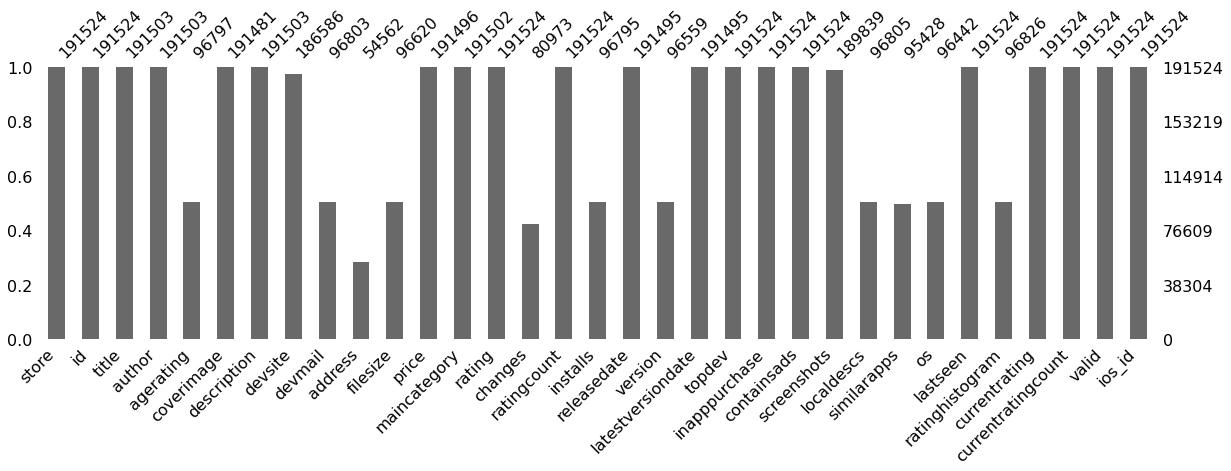

In [27]:
msno.bar(df, figsize=(20, 5))

<h3> Android missing items <h3/>

<AxesSubplot:>

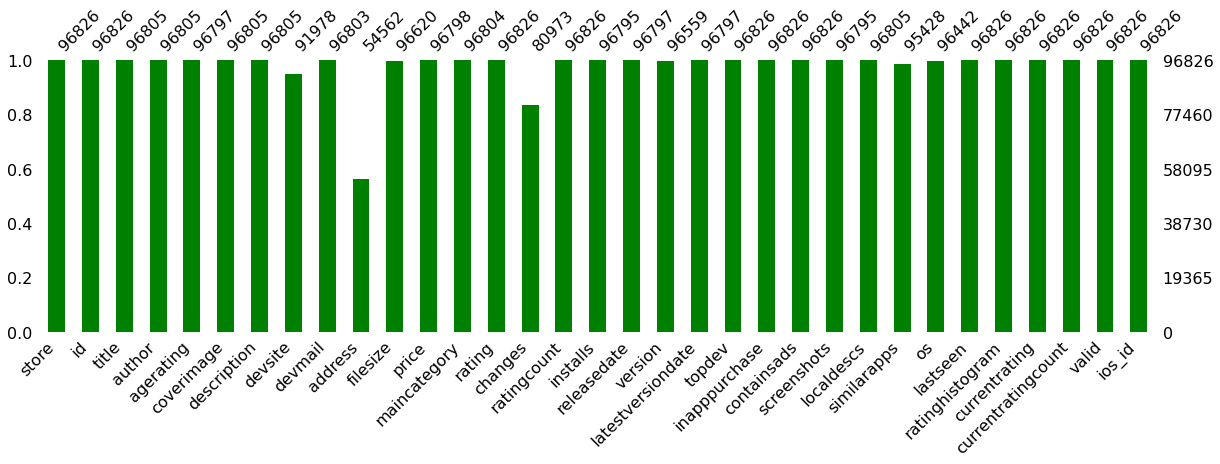

In [182]:
msno.bar(google_play_df, figsize=(20, 5), color='g')

<h3> Apple missing items <h3/>

<AxesSubplot:>

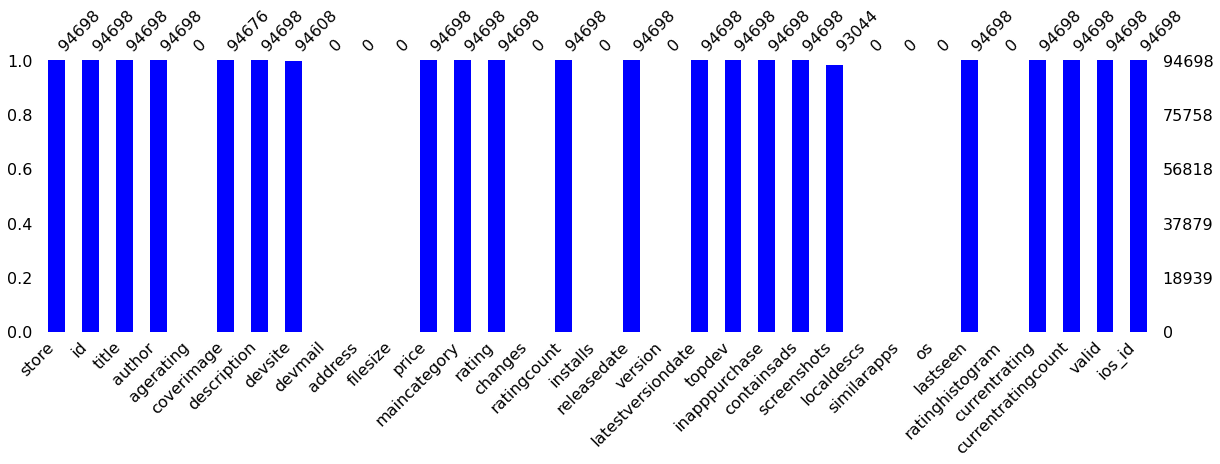

In [183]:
msno.bar(app_store_df, figsize=(20, 5), color='b')

In [597]:
def plot_pie(labels, sizes, figsize):
    fig1, ax1 = plt.subplots(figsize=figsize)

    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)

    ax1.axis('equal')

    plt.show()

In [661]:
def plot_pie(title, labels, sizes):
    percentages = np.around(sizes/sizes.sum()*100, 2)
    patches = plt.pie(sizes, startangle=90)
    plt.legend(patches, labels=['%s, %s%%' % (l, p) for l, p in zip(labels, percentages)], loc="best")
    plt.title(title)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

<h3> Android OS distribution <h3/>

In [662]:
os_value_count = google_play_df['os'].value_counts()

os_labels = os_value_count.index
os_values = os_value_count.values

top_4_labels = os_labels[:4]
top_4_values = os_values[:4]

other_amount = os_values[4:].sum()

top_5_labels = np.append(top_4_labels, 'other')
top_5_values = np.append(top_4_values, other_amount)

top_5_values

array([21208, 18370, 16524,  6622, 33718])

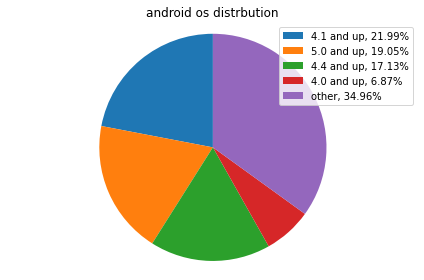

In [663]:
plot_pie(title='android os distrbution', labels=top_5_labels, sizes=top_5_values)

<h3> Android avg file size <br> Apple dosent state file size <h3/>

In [188]:
# return the file size in mb
def size_to_number(size):
    if not isinstance(size, str):
        return

    size_without_coma = size.strip(',')
    ending = size[-1:]

    size_value = re.findall("[-+]?\d*\.\d+|\d+", size)

    if len(size_value) == 0:
        return

    size_value = float(size_value[0])

    if ending == 'K' or ending == 'k':
        return size_value / 1000

    if ending == 'M' or ending == 'm':
        return size_value
    
    if ending == 'G' or ending == 'g':
        return size_value * 1000

    raise Exception(f'Unexpected ending: {ending}')

In [189]:
android_filesizes_in_number = google_play_df['filesize'].apply(size_to_number)

In [688]:
print(f'avg file size: android - {android_filesizes_in_number.mean()}M')

avg file size: android - 27.066482092154978M


<h3> Comparing last version dates <h3/>

In [365]:
def parse_date(date):
    if not isinstance(date, str):
        # always nan values
        return

    return dateparser.parse(date)

In [674]:
latestversiondate_google_play = matched_google_play['latestversiondate_google_play'].apply(parse_date)
latestversiondate_app_store = matched_google_play['latestversiondate_app_store'].apply(parse_date)

In [675]:
latestversiondate_google_play_values = latestversiondate_google_play.values.astype('datetime64[D]')
latestversiondate_app_store_values = latestversiondate_app_store.values.astype('datetime64[D]')

In [676]:
nat_android_index = np.where(np.isnat(latestversiondate_google_play_values))
nat_apple_index = np.where(np.isnat(latestversiondate_app_store_values))

In [677]:
# Remove nat values from both apple and android dates

android_without_nat = np.delete(latestversiondate_google_play_values, nat_android_index)
android_without_nat = np.delete(android_without_nat, nat_apple_index)

apple_without_nat = np.delete(latestversiondate_app_store_values, nat_apple_index)
apple_without_nat = np.delete(apple_without_nat, nat_android_index)

In [678]:
differences = np.absolute(android_without_nat - apple_without_nat).astype(int)

In [691]:
np.median(differences)

1162.0

<h3> Titles similarties <h3/>

In [523]:
google_play_titles =  matched_google_play['title_google_play'].values.astype(str)
app_store_titles = matched_google_play['title_app_store'].values.astype(str)

google_play_titles.shape, app_store_titles.shape

((94819,), (94819,))

In [666]:
title_differences = np.array([])

# both length are the same
for i in range(len(app_store_titles)):
    android_title = google_play_titles[i]
    apple_title = app_store_titles[i]
    jaro = jellyfish.jaro_distance(android_title, apple_title)
    title_differences = np.append(title_differences, jaro)

In [667]:
first_q = title_differences[title_differences <= 0.25]
second_q = title_differences[np.logical_and(title_differences > 0.25, title_differences <= 0.50)]
third_q = title_differences[np.logical_and(title_differences > 0.50, title_differences <= 0.75)]
forth_q = title_differences[np.logical_and(title_differences > 0.75, title_differences <= 1.0)]

In [670]:
values_per_quarter = np.array([len(first_q), len(second_q), len(third_q), len(forth_q)])
labels_per_quarter = np.array(['x <= 0.25', '0.25 < x <= 0.5', '0.50 < x <= 0.75', '0.75 < x <= 1.00'])

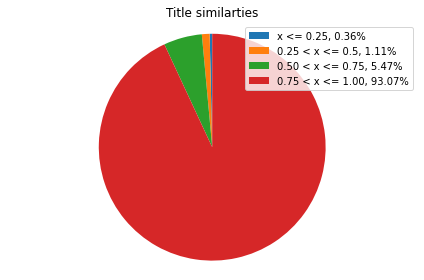

In [671]:
plot_pie(title='Title similarties', labels=labels_per_quarter, sizes=values_per_quarter)